Data Science Dojo <br/>
Copyright (c) 2020

---

**Exercise:** Feature engineering for extracting out the signal/pattern <br/>
**Level:** Advanced <br/>
**Expected time to complete:** 1 hour <br/>

# Feature engineering – the extraction process

## Data source

Team Performance for Quarter 1 data is a simulated dataset that looks at common problems in team performance in any field of work. However, the problems are not obvious on the surface. 

Online Purchases data is a simulated dataset that records each customer's total purchase for each session they are on the website. Not all factors are recorded, such as time of purchase. However, key patterns and insights can still be gained from the few data points collected. 

Google Analytics Sessions on Austintexas.gov looks at viewers of the Austintexas.gov website. A single session can contain multiple page views, events, social interactions, and e-commerce transactions, with the series being a total count each day. However, the time series pattern or trend is not obvious on the surface. 
This dataset can be accessed here: https://catalog.data.gov/dataset/google-analytics-sessions-on-austintexas-gov

## Load the packages

Please pip install pandas, matplotlib, seaborn, numpy, and datetime

In [2]:
# Load the packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime

## Read team performance quarter 1 data

In [3]:
# Read in team_performance_q1 data
team_performance = pd.read_csv('Datasets/team_performance_q1.csv')

## Inspect team performance data

Notice performance level could be a categorical representation of both completed tasks and difficulty.

In [4]:
# Preview the data
print(team_performance.head())

              Sprint Period    Team Member Team Leader Tasks Difficulty Avg  \
0  Jan 1 2019 - Jan 15 2019   Janet Chaves  Ben Fullen               Medium   
1  Jan 1 2019 - Jan 15 2019  Henry Swansen  Ben Fullen               Medium   
2  Jan 1 2019 - Jan 15 2019          Yu Li  Ben Fullen            Difficult   
3  Jan 1 2019 - Jan 15 2019   Bharat Datra  Ben Fullen            Difficult   
4  Jan 1 2019 - Jan 15 2019     Ali Khalin  Ben Fullen               Medium   

   Num Assigned Tasks  Num Completed Tasks Performance Level  
0                   8                    8             Green  
1                   8                    8             Green  
2                   6                    6             Green  
3                   6                    6             Green  
4                   8                    7            Yellow  


In [5]:
# Check data types of given features make sense
print(team_performance.dtypes)

Sprint Period           object
Team Member             object
Team Leader             object
Tasks Difficulty Avg    object
Num Assigned Tasks       int64
Num Completed Tasks      int64
Performance Level       object
dtype: object


I'm Interested in a team member's performance level as the business outcome.

In [6]:
# Check the unique categorical levels in Performance Level
print(team_performance['Performance Level'].unique())

['Green' 'Yellow' 'Orange' 'Red']


Notice how given features give us clues for how outcome could have been assigned.

In [7]:
print(team_performance[team_performance['Performance Level']=='Green'].head())
print(team_performance[team_performance['Performance Level']=='Red'].head())

              Sprint Period    Team Member Team Leader Tasks Difficulty Avg  \
0  Jan 1 2019 - Jan 15 2019   Janet Chaves  Ben Fullen               Medium   
1  Jan 1 2019 - Jan 15 2019  Henry Swansen  Ben Fullen               Medium   
2  Jan 1 2019 - Jan 15 2019          Yu Li  Ben Fullen            Difficult   
3  Jan 1 2019 - Jan 15 2019   Bharat Datra  Ben Fullen            Difficult   
5  Jan 1 2019 - Jan 15 2019   Rachel Braun  Ben Fullen            Difficult   

   Num Assigned Tasks  Num Completed Tasks Performance Level  
0                   8                    8             Green  
1                   8                    8             Green  
2                   6                    6             Green  
3                   6                    6             Green  
5                   6                    6             Green  
                Sprint Period   Team Member       Team Leader  \
9    Jan 1 2019 - Jan 15 2019  Marcus Jones  Raymond Freedman   
10   Jan 1 2019 -

## Create overall score feature

Create a feature that takes into account both the number of completed tasks and difficulty level.

The higher the number of completed tasks the higher the weight. The higher the difficulty level the higher the weight.

If a team member completes all assigned tasks at the max difficulty level, a high score will be given.

In [8]:
team_performance['Tasks Completed Weight'] = team_performance['Num Completed Tasks'] / team_performance['Num Assigned Tasks']
print(team_performance.head())

              Sprint Period    Team Member Team Leader Tasks Difficulty Avg  \
0  Jan 1 2019 - Jan 15 2019   Janet Chaves  Ben Fullen               Medium   
1  Jan 1 2019 - Jan 15 2019  Henry Swansen  Ben Fullen               Medium   
2  Jan 1 2019 - Jan 15 2019          Yu Li  Ben Fullen            Difficult   
3  Jan 1 2019 - Jan 15 2019   Bharat Datra  Ben Fullen            Difficult   
4  Jan 1 2019 - Jan 15 2019     Ali Khalin  Ben Fullen               Medium   

   Num Assigned Tasks  Num Completed Tasks Performance Level  \
0                   8                    8             Green   
1                   8                    8             Green   
2                   6                    6             Green   
3                   6                    6             Green   
4                   8                    7            Yellow   

   Tasks Completed Weight  
0                   1.000  
1                   1.000  
2                   1.000  
3                   1.000  


In [9]:
print(team_performance['Tasks Difficulty Avg'].unique())
print(len(team_performance['Tasks Difficulty Avg'].unique()))

['Medium' 'Difficult' 'Easy']
3


In [10]:
team_performance['Tasks Difficulty Weight'] = np.where(team_performance['Tasks Difficulty Avg']=='Difficult', 
                                                       3/len(team_performance['Tasks Difficulty Avg'].unique()),
                                                  np.where(team_performance['Tasks Difficulty Avg']=='Medium', 
                                                           2/len(team_performance['Tasks Difficulty Avg'].unique()),
                                                           1/len(team_performance['Tasks Difficulty Avg'].unique()) 
                                                          )
                                                     )

In [11]:
print(team_performance[team_performance['Tasks Difficulty Avg']=='Difficult'].head())
print(team_performance[team_performance['Tasks Difficulty Avg']=='Medium'].head())
print(team_performance[team_performance['Tasks Difficulty Avg']=='Easy'].head())

              Sprint Period   Team Member       Team Leader  \
2  Jan 1 2019 - Jan 15 2019         Yu Li        Ben Fullen   
3  Jan 1 2019 - Jan 15 2019  Bharat Datra        Ben Fullen   
5  Jan 1 2019 - Jan 15 2019  Rachel Braun        Ben Fullen   
6  Jan 1 2019 - Jan 15 2019  Don Van Boen        Ben Fullen   
9  Jan 1 2019 - Jan 15 2019  Marcus Jones  Raymond Freedman   

  Tasks Difficulty Avg  Num Assigned Tasks  Num Completed Tasks  \
2            Difficult                   6                    6   
3            Difficult                   6                    6   
5            Difficult                   6                    6   
6            Difficult                   6                    6   
9            Difficult                   8                    1   

  Performance Level  Tasks Completed Weight  Tasks Difficulty Weight  
2             Green                   1.000                      1.0  
3             Green                   1.000                      1.0  
5    

In [12]:
team_performance['Overall Score'] = team_performance['Tasks Completed Weight'] * team_performance['Tasks Difficulty Weight']
print(team_performance.head())

              Sprint Period    Team Member Team Leader Tasks Difficulty Avg  \
0  Jan 1 2019 - Jan 15 2019   Janet Chaves  Ben Fullen               Medium   
1  Jan 1 2019 - Jan 15 2019  Henry Swansen  Ben Fullen               Medium   
2  Jan 1 2019 - Jan 15 2019          Yu Li  Ben Fullen            Difficult   
3  Jan 1 2019 - Jan 15 2019   Bharat Datra  Ben Fullen            Difficult   
4  Jan 1 2019 - Jan 15 2019     Ali Khalin  Ben Fullen               Medium   

   Num Assigned Tasks  Num Completed Tasks Performance Level  \
0                   8                    8             Green   
1                   8                    8             Green   
2                   6                    6             Green   
3                   6                    6             Green   
4                   8                    7            Yellow   

   Tasks Completed Weight  Tasks Difficulty Weight  Overall Score  
0                   1.000                 0.666667       0.666667  
1   

Check overall score makes sense with the given performance level. If so, this could be a useful feature indicative of the outcome.

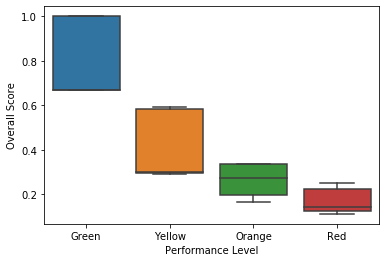

In [13]:
# Plot overall score with performance level
overall_score_plot = sns.boxplot(x='Performance Level', y='Overall Score', data=team_performance)
plt.show()

## Performance on a team level

Check how people perform on a team level. 

Could certain red, green, organge or yellow outcomes be mostly attributed to certain teams or certain team leaders?

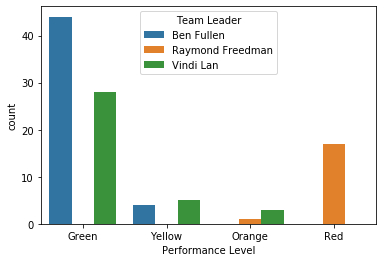

In [14]:
# Plot team leader with performance level
teams_plot = sns.countplot(x='Performance Level', hue='Team Leader', data=team_performance)
plt.show()

Notice how team counts look like there's a disproportion of workers.

Could the red performing team be disadvantaged with much less people to get work done?

In [15]:
# Check how many team members belong to each team
# leader by counting each team leader, taking into
# account team leaders repeat across ea sprint period
print(team_performance.groupby('Team Leader').size() / len(team_performance['Sprint Period'].unique()))

Team Leader
Ben Fullen          8.0
Raymond Freedman    3.0
Vindi Lan           6.0
dtype: float64


Are these small group of red performing team members also disadvantaged with mostly difficult tasks?

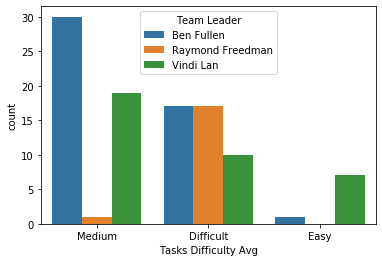

In [16]:
# Plot team leader with tasks difficulty
tasks_difficulty_teams_plot = sns.countplot(x='Tasks Difficulty Avg', hue='Team Leader', data=team_performance)
plt.show()

## Create team size feature

Create a feature that takes into account team size, which could lead to a certain outcome.

In [17]:
print(sum(team_performance['Team Leader']=='Raymond Freedman') / len(team_performance['Sprint Period'].unique()) )

3.0


In [18]:
team_performance['Team Size'] = np.where(team_performance['Team Leader']=='Raymond Freedman', 
                                         sum(team_performance['Team Leader']=='Raymond Freedman') / len(team_performance['Sprint Period'].unique()),
                                    np.where(team_performance['Team Leader']=='Ben Fullen', 
                                             sum(team_performance['Team Leader']=='Ben Fullen') / len(team_performance['Sprint Period'].unique()),
                                             sum(team_performance['Team Leader']=='Vindi Lan') / len(team_performance['Sprint Period'].unique()) 
                                            )
                                        )

In [19]:
print(team_performance[team_performance['Team Leader']=='Raymond Freedman'].head())
print(team_performance[team_performance['Team Leader']=='Ben Fullen'].head())
print(team_performance[team_performance['Team Leader']=='Vindi Lan'].head())

                Sprint Period   Team Member       Team Leader  \
8    Jan 1 2019 - Jan 15 2019      Lucy Yen  Raymond Freedman   
9    Jan 1 2019 - Jan 15 2019  Marcus Jones  Raymond Freedman   
10   Jan 1 2019 - Jan 15 2019   Luke Ballen  Raymond Freedman   
25  Jan 16 2019 - Jan 30 2019      Lucy Yen  Raymond Freedman   
26  Jan 16 2019 - Jan 30 2019  Marcus Jones  Raymond Freedman   

   Tasks Difficulty Avg  Num Assigned Tasks  Num Completed Tasks  \
8                Medium                   8                    4   
9             Difficult                   8                    1   
10            Difficult                   8                    2   
25            Difficult                   9                    2   
26            Difficult                   9                    2   

   Performance Level  Tasks Completed Weight  Tasks Difficulty Weight  \
8             Orange                0.500000                 0.666667   
9                Red                0.125000          

## Create a under/well resourced feature

Create a feature that takes into account team size smaller than other teams, and where these disadvantaged people are also 
lumbered with the most difficult work. Both of these points could lead to a certain outcome.

In [20]:
team_performance['Resources'] = np.where((team_performance['Team Size']<6) & (team_performance['Tasks Difficulty Avg']=='Difficult'), 
                                         'Under resourced', 
                                         'Well resourced')
print(team_performance.head())

              Sprint Period    Team Member Team Leader Tasks Difficulty Avg  \
0  Jan 1 2019 - Jan 15 2019   Janet Chaves  Ben Fullen               Medium   
1  Jan 1 2019 - Jan 15 2019  Henry Swansen  Ben Fullen               Medium   
2  Jan 1 2019 - Jan 15 2019          Yu Li  Ben Fullen            Difficult   
3  Jan 1 2019 - Jan 15 2019   Bharat Datra  Ben Fullen            Difficult   
4  Jan 1 2019 - Jan 15 2019     Ali Khalin  Ben Fullen               Medium   

   Num Assigned Tasks  Num Completed Tasks Performance Level  \
0                   8                    8             Green   
1                   8                    8             Green   
2                   6                    6             Green   
3                   6                    6             Green   
4                   8                    7            Yellow   

   Tasks Completed Weight  Tasks Difficulty Weight  Overall Score  Team Size  \
0                   1.000                 0.666667       0.6

Check the resource level makes sense with leading to a certain outcome. If so, this could be a useful feature indicative of a certain outcome.

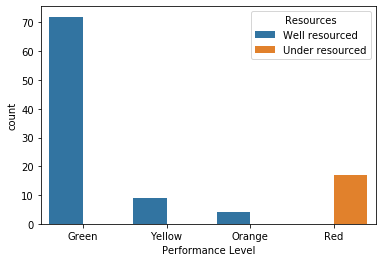

In [21]:
# Plot resources with performance level
resources_plot = sns.countplot(x='Performance Level', hue='Resources', data=team_performance)
plt.show()

## Read online purchases data

In [22]:
# Read in online_purchases data
online_purchases = pd.read_csv('Datasets/online_purchases.csv')

## Inspect online purchases data

I'm interested in total amount purchased as the business outcome.

In [23]:
# Preview the data
print(online_purchases.head())

     ip_location  num_visits_before_purchase  avg_mins_on_site  \
0         Austin                           3              13.4   
1  Washington DC                          10              25.6   
2   Brooklyn NYC                           6              16.2   
3      Baltimore                           9              36.8   
4         Dulles                          12              30.1   

   total_usd_purhcase_amount  
0                      99.99  
1                       0.00  
2                       5.99  
3                       0.00  
4                       0.00  


In [24]:
# Check data types of given features make sense
print(online_purchases.dtypes)

ip_location                    object
num_visits_before_purchase      int64
avg_mins_on_site              float64
total_usd_purhcase_amount     float64
dtype: object


Check if online customers are mostly high purchasers or low or a wide range.

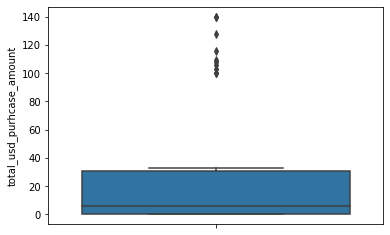

In [25]:
# Plot total purchase amount
purchase_amount_plot = sns.boxplot(y='total_usd_purhcase_amount', data=online_purchases)
plt.show()

It would be interesting to find out if the outlier high purchasers could be mostly coming from a certain location.

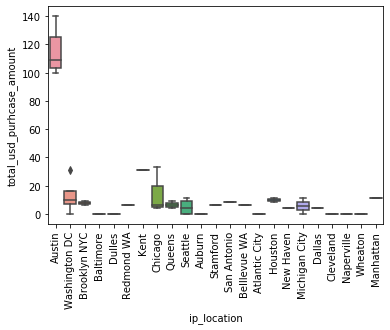

In [26]:
# Plot location with total purchase amount
purchaser_locations_plot = sns.boxplot(x='ip_location', y='total_usd_purhcase_amount', data=online_purchases)
purchaser_locations_plot.set_xticklabels(purchaser_locations_plot.get_xticklabels(), rotation=90)
plt.show()

Check the relationship with other features.

It would be interesting to see if there is a relationship between number of visits to the shopping cart page before purchase with the outcome, and average mins on site with the outcome.

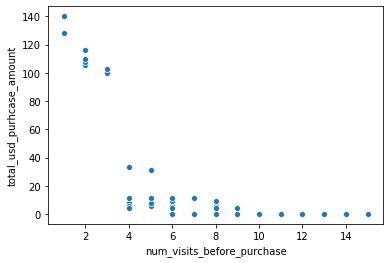

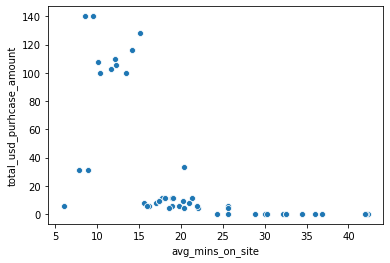

In [27]:
cart_visits_plot = sns.scatterplot(x='num_visits_before_purchase', y='total_usd_purhcase_amount', data=online_purchases)
plt.show()

avg_mins_plot = sns.scatterplot(x='avg_mins_on_site', y='total_usd_purhcase_amount', data=online_purchases)
plt.show()

<i>Note: 
When you do not have clear labels of numeric features to help guide you, you can visualize all relationships between numeric features at once using a scatterplot matrix.

See if some features highly correlated with the outcome. Some features that highly correlate with each other could also be redundant features.

See useless_labels_mtcars.csv as an example. 
</i>

## Create customer value feature

Create a feature that takes into account the Austin location and low number of visits to the cart, as these seem to lead to high purchases.

In [28]:
online_purchases['customer_value'] = np.where((online_purchases['ip_location']=='Austin') & (online_purchases['num_visits_before_purchase']<=3), 
                                              'High value', 
                                              'Low value')
print(online_purchases.head())

     ip_location  num_visits_before_purchase  avg_mins_on_site  \
0         Austin                           3              13.4   
1  Washington DC                          10              25.6   
2   Brooklyn NYC                           6              16.2   
3      Baltimore                           9              36.8   
4         Dulles                          12              30.1   

   total_usd_purhcase_amount customer_value  
0                      99.99     High value  
1                       0.00      Low value  
2                       5.99      Low value  
3                       0.00      Low value  
4                       0.00      Low value  


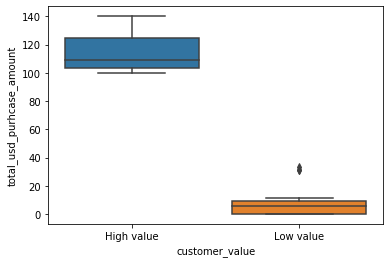

In [29]:
high_purchases_plot = sns.boxplot(x='customer_value', y='total_usd_purhcase_amount', data=online_purchases)
plt.show()

When using clustering or regression, categorical level features need number representation that is not ordinal.

In [30]:
# One-hot encode non-ordinal categorical features
# Exclude location; too many one-hot features not
# a good idea for clustering
# Simplify locations by main areas, then one-hot encode
online_purchases_onehot = pd.get_dummies(online_purchases.iloc[:,1:5])
print(online_purchases_onehot.head())

   num_visits_before_purchase  avg_mins_on_site  total_usd_purhcase_amount  \
0                           3              13.4                      99.99   
1                          10              25.6                       0.00   
2                           6              16.2                       5.99   
3                           9              36.8                       0.00   
4                          12              30.1                       0.00   

   customer_value_High value  customer_value_Low value  
0                          1                         0  
1                          0                         1  
2                          0                         1  
3                          0                         1  
4                          0                         1  


Techniques that rely on distances need a meaningful measure for distances on a scale.

Scale/normalize data to a scale of 0-1. Min-max scaling is a common way to do this. Minimum feature value is 0 through to max value 1.

In [31]:
# The min-max scale function - how to scale data into 0-1

In [32]:
def scale(dataset):
    dataset = (dataset-dataset.min())/(dataset.max()-dataset.min())
    return dataset

online_purchases_scaled = scale(online_purchases.iloc[:,1:4])

print(online_purchases_scaled.head())

   num_visits_before_purchase  avg_mins_on_site  total_usd_purhcase_amount
0                    0.142857          0.203857                   0.714265
1                    0.642857          0.539945                   0.000000
2                    0.357143          0.280992                   0.042789
3                    0.571429          0.848485                   0.000000
4                    0.785714          0.663912                   0.000000


## Read web sessions data

In [33]:
# Read in Google_Analytics_Sessions_on_Austintexas.gov data
webpg_sessions = pd.read_csv('Datasets/Google_Analytics_Sessions_on_Austintexas.gov.csv')

## Inspect web sessions data

In [34]:
# Check data type of given time-based observations and datetime make sense
print(webpg_sessions.dtypes)
# Fix datetime to be treated as a date
webpg_sessions['Date'] = pd.to_datetime(webpg_sessions['Date'])
print(webpg_sessions.dtypes)

Date        object
Sessions     int64
dtype: object
Date        datetime64[ns]
Sessions             int64
dtype: object


Read in the data as a time series and plot the observations over time to check for potential trend, seasonality, cyclic pattern, or no obvious trend.

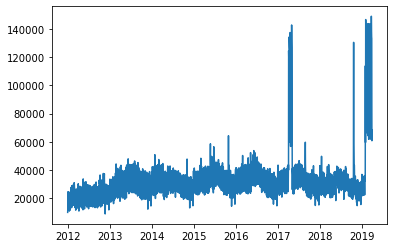

In [35]:
# Plot the time series data
webpg_sessions_ts = webpg_sessions.set_index('Date')
plt.plot(webpg_sessions_ts)
plt.show()

Notice how the pattern is difficult to read and interpret

## Create monthly average time series

Daily observations are difficult to read. 

The business is okay with estimating a monthly average. Extreme high values will also be smoothed over with an average. This could make the underlying pattern more visible.

In [36]:
webpg_sessions_monthly = webpg_sessions.groupby(pd.Grouper(key='Date', freq='1M')).mean()
print(webpg_sessions_monthly.head())

                Sessions
Date                    
2012-01-31  18882.000000
2012-02-29  23300.586207
2012-03-31  20704.032258
2012-04-30  22171.833333
2012-05-31  22330.677419


Plot the monthly observations over time to check for potential trend, seasonality, cyclic pattern, or no obvious trend.

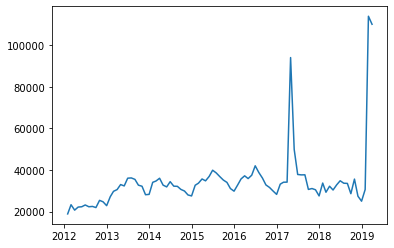

In [37]:
plt.plot(webpg_sessions_monthly)
plt.show()

## Create day and month categories from datetime

In regression, datetime might need to be extracted into column features of month and day.

It would be interesting to see if there are certain days and/or months where web sessions tend to spike?

In [38]:
webpg_sessions['Month'] = webpg_sessions['Date'].dt.month
webpg_sessions['Day'] = webpg_sessions['Date'].dt.day_name()
print(webpg_sessions.head())

        Date  Sessions  Month        Day
0 2019-03-31     68335      3     Sunday
1 2019-03-30     60763      3   Saturday
2 2019-03-29    113197      3     Friday
3 2019-03-28    133210      3   Thursday
4 2019-03-27    134408      3  Wednesday


In [39]:
webpg_sessions['Month'] = pd.Categorical(webpg_sessions.Month)
webpg_sessions['Day'] = pd.Categorical(webpg_sessions.Day)
print(webpg_sessions.dtypes)

Date        datetime64[ns]
Sessions             int64
Month             category
Day               category
dtype: object


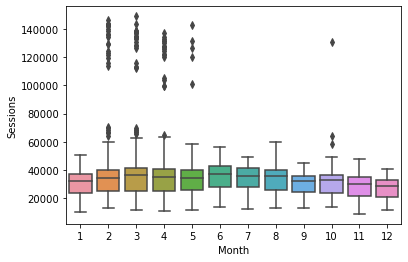

In [40]:
month_sessions = sns.boxplot(x='Month', y='Sessions', data=webpg_sessions)
plt.show()

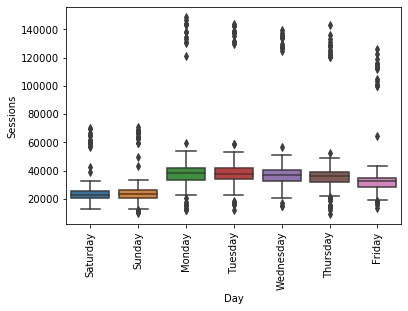

In [41]:
day_sessions = sns.boxplot(x='Day', y='Sessions', data=webpg_sessions,order=['Saturday','Sunday','Monday','Tuesday','Wednesday','Thursday','Friday'])
day_sessions.set_xticklabels(day_sessions.get_xticklabels(), rotation=90)
plt.show()